# Natural Language Processing:Twitter Sentiment Analysis

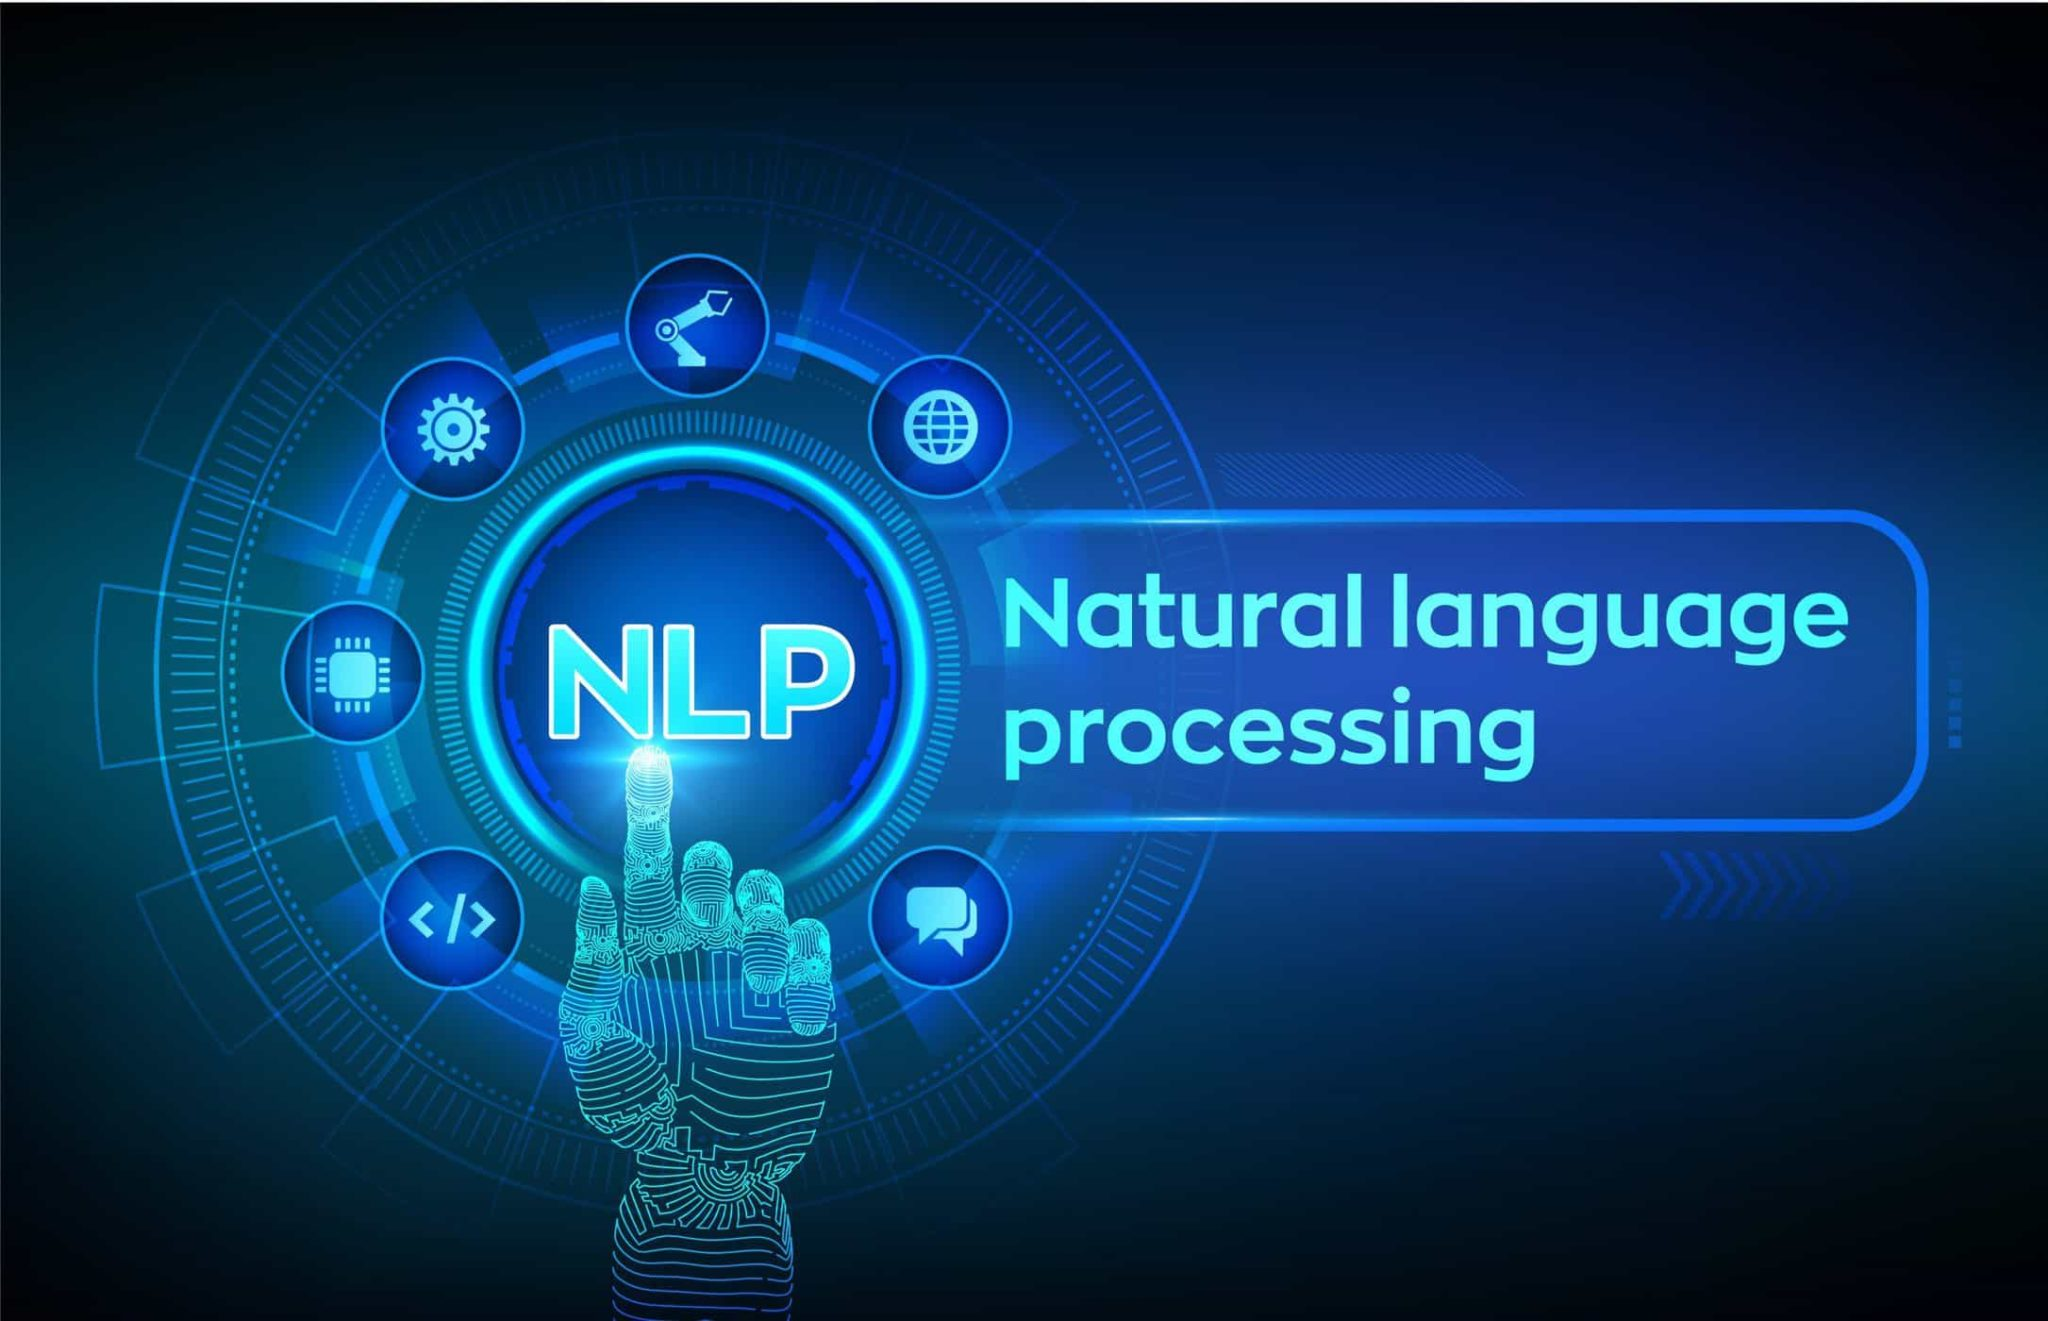

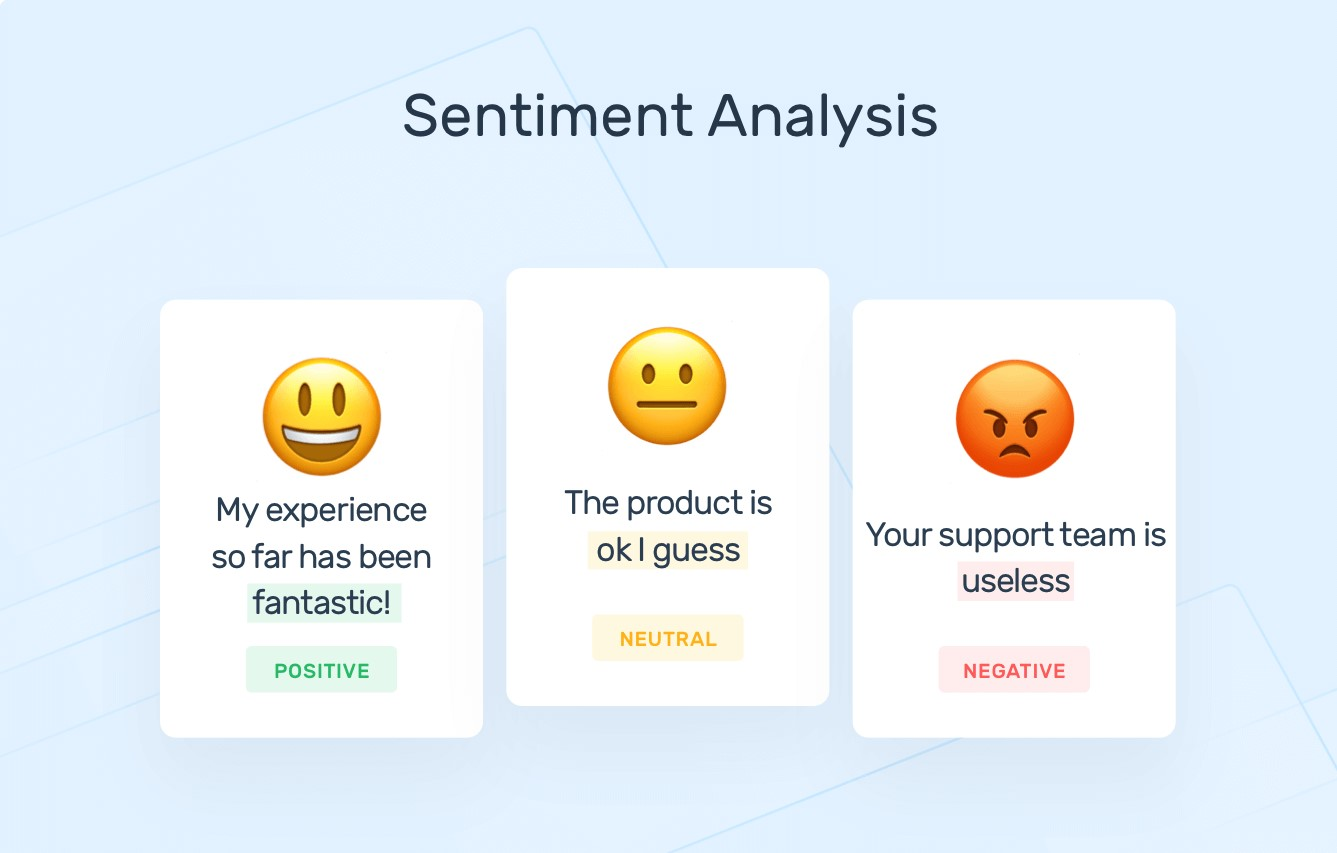

***TASK 1: Understanding the problem statement and business case***

Natural language processors(NLP) work by converting words into numbers.

These numbers are then used to train an AI/ML model to make predictions

Predictions could be sentiment inferred from social media posts and product reviews

AI/ML- based sentiment analysis is crucial for companies to automatically predict whether their customers are happy or not

The process could be done automatically without having humans manually review thousands of tweets and customer reviews.

In this case study, we will analyze thousands of twitter tweets to predict people's sentiment

***TASK 2:Import Libraries and datasets***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the data
tweets_df=pd.read_csv(r'C:\Users\jamesb5\Desktop\train.csv')
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
#summarized information about the loaded dataset
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
#describe some major numerical features of the dataset
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [5]:
#taking a look into the tweet column
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [6]:
#dropping the id column
del tweets_df['id']

In [7]:
#verifying that the id column has been dropped 
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


***TASK 3: EXPLORE DATASET***

<Axes: >

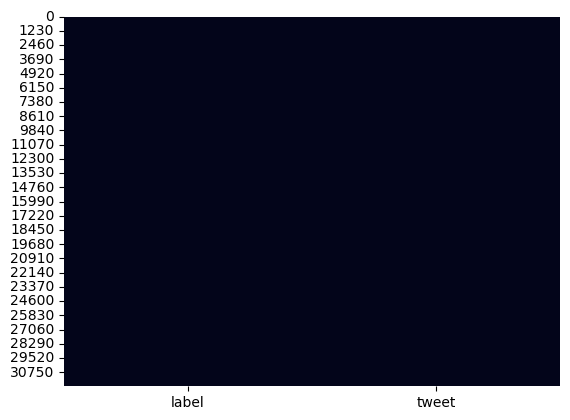

In [8]:
#plotting a heat map to check for any null element in the data frame
sns.heatmap(tweets_df.isnull(),cbar=False)

array([[<Axes: title={'center': 'label'}>]], dtype=object)

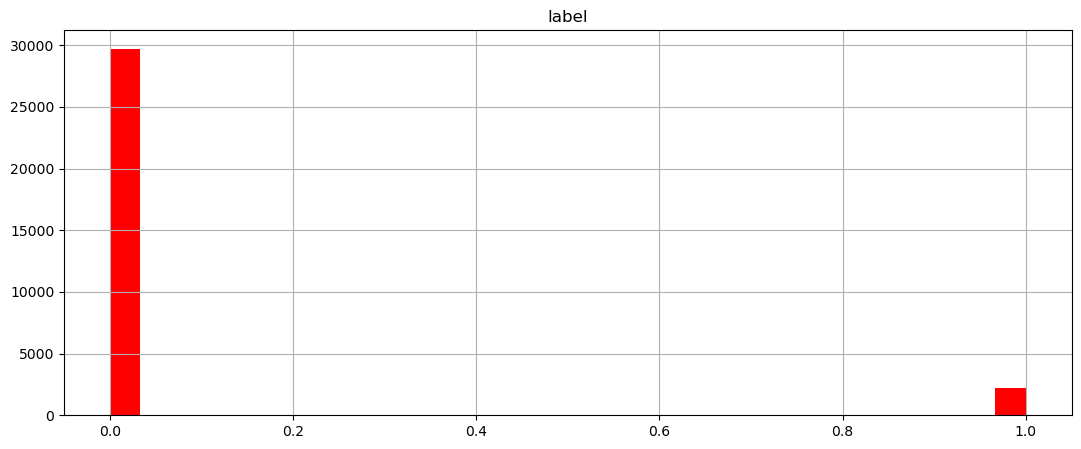

In [9]:
tweets_df.hist(bins=30, figsize=(13,5), color='r')

<Axes: xlabel='label', ylabel='count'>

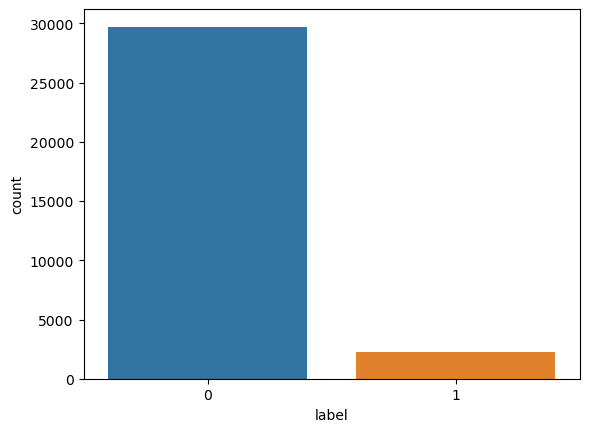

In [10]:
#representing the data using countplot from the seaborn library
sns.countplot(data=tweets_df,x='label')

In [11]:
#to get the length of the messages
tweets_df['length']=tweets_df['tweet'].apply(len)

In [12]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


C:\Users\jamesb5\AppData\Local\Temp\ipykernel_6692\4136043524.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tweets_df['length'])


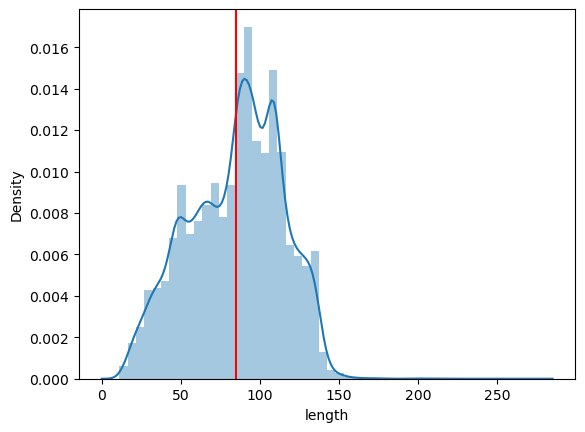

In [13]:
#to get the distribution of the length of tweets
sns.distplot(tweets_df['length'])

#this produces a line that depicts the mean distribution of the length of tweets
plt.axvline(x=np.mean(tweets_df['length']),c='r')

In [14]:
#a summary of the new dataframe
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [15]:
#to see the shortest tweet
tweets_df[tweets_df['length']==11]['tweet'].iloc[0]

'i love you '

In [16]:
#to view the tweet with the average length
tweets_df[tweets_df['length']==84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [17]:
#to separate the tweets into two categories of positive and negative
positive = tweets_df[tweets_df['label']==0]
negative = tweets_df[tweets_df['label']==1]

In [18]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [19]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


***TASK 4: PLOT THE WORDCLOUD***

In [20]:
#converting all the tweets into a list
sentences=tweets_df['tweet'].tolist()

In [21]:
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [22]:
#obtain the length of the sentences
len(sentences)

31962

In [23]:
sentences_as_one_string=" ".join(sentences)

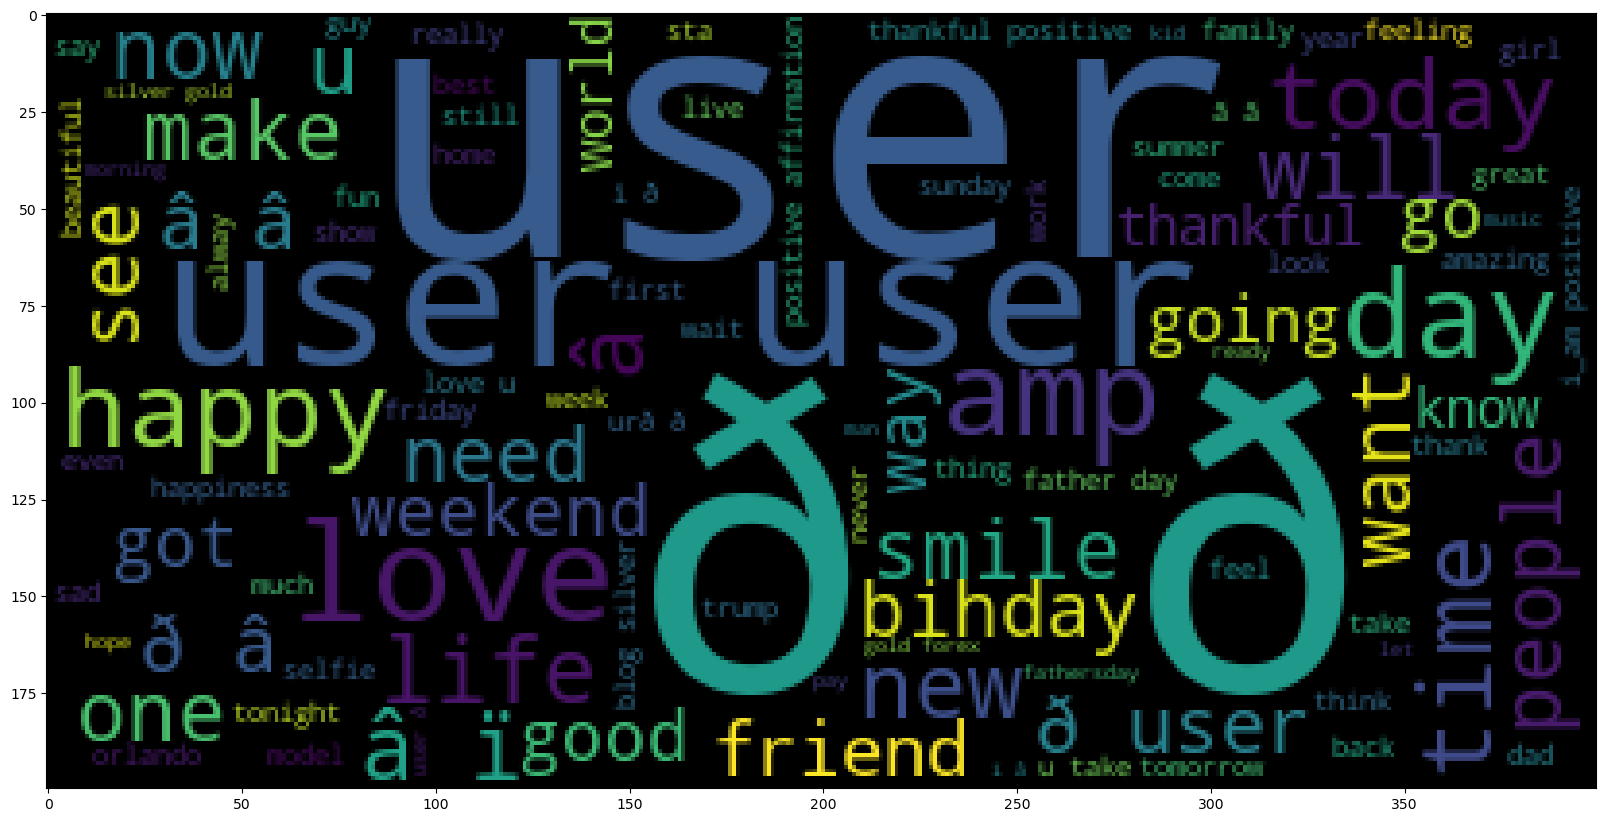

In [24]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

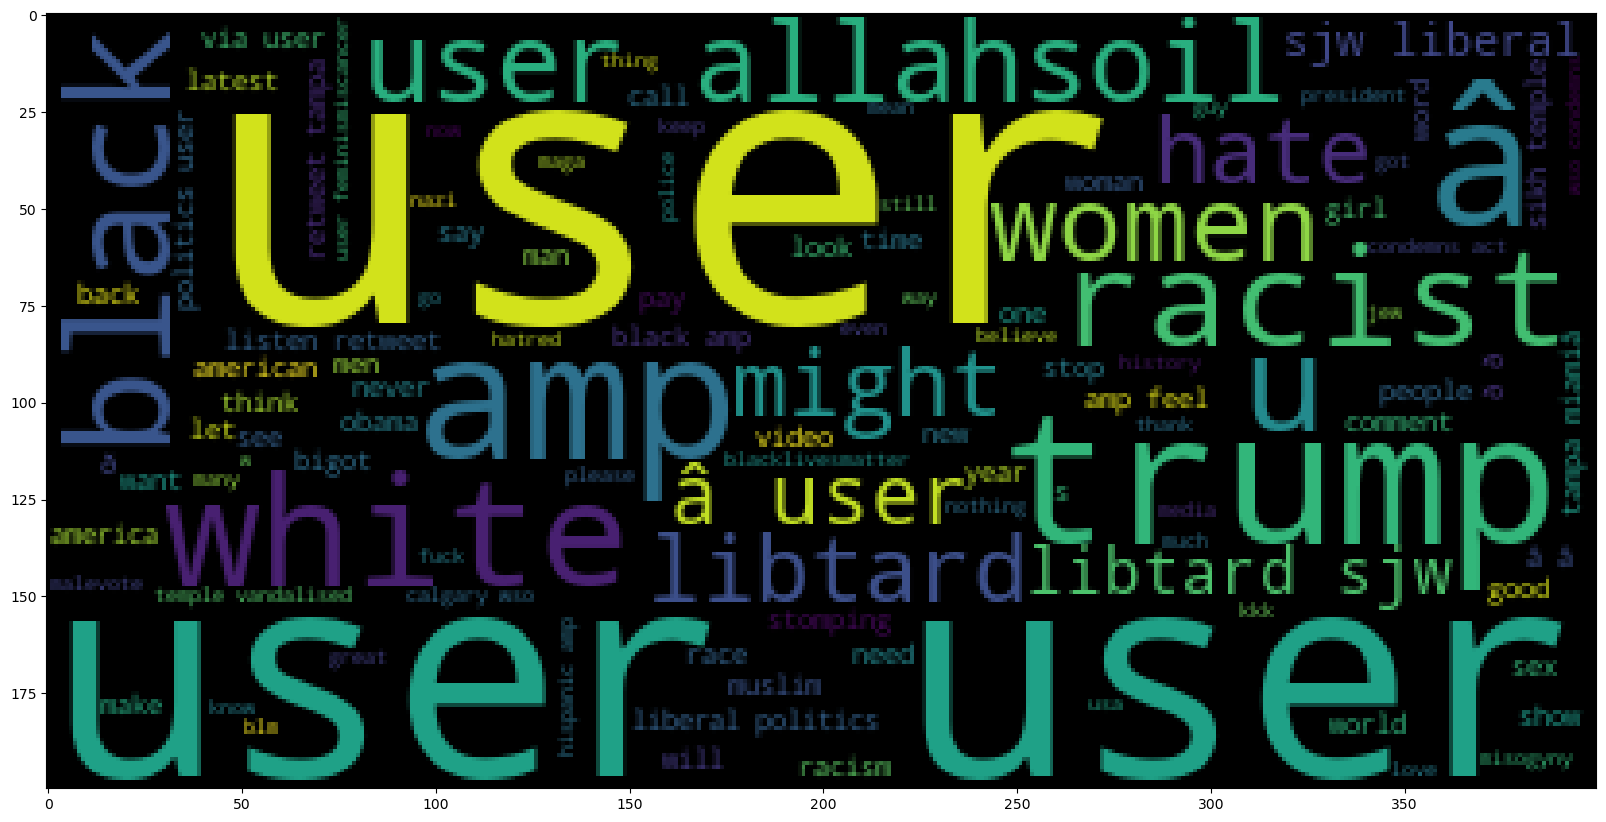

In [25]:
#Plotting the wordcloud of the negative dataframe
negative_sentences=negative['tweet'].tolist()
negative_sentences_as_one_string=" ".join(negative_sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

***TASK 5:PERFORM DATA CLEANING-REMOVE PUNCTUATION FROM TEXT***

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [28]:
#Using list comprehension to remove punctuation from text
Test_punc_removed = [char for char in Test if char not in string.punctuation]

In [29]:
#join the characters again to form the string
Test_punc_removed_join=''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [30]:
#using punctuation using another means
Test_punc_removed =[]
for char in Test:
    if char not in string.punctuation:
        Test_punc_removed.append(char)
        
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

***TASK 6: PERFORM DATA CLEANING-REMOVING STOPWORDS***

In [31]:
#importing a library (natural language tool kit)
import nltk 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jamesb5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
#we need to download stopwords package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
# stop words are general words...which doesnt make sense to be included when an AI model is trained or taught
#hence, they should be removed

In [34]:
Test_punc_removed_join_clean =[word 
                               for word in Test_punc_removed_join.split() 
                               if word.lower() not in stopwords.words('english')]

In [35]:
Test_punc_removed_join_clean

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

MINI CHALLENGE:
For the following text, create a pipeline to remove punctuations followed by removing stopwords

In [36]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [37]:
#removing punctuations from mini_challenge
mini_challenge_punc_removed=[]
for char in mini_challenge:
    if char not in string.punctuation:
        mini_challenge_punc_removed.append(char)
mini_challenge_punc_removed_join=''.join(mini_challenge_punc_removed)
mini_challenge_punc_removed_join    

'Here is a mini challenge that will teach you how to remove stopwords and punctuations'

In [38]:
#removing stopwords from mini_challenge
mini_challenge_punc_removed_clean=[word
                                  for word in mini_challenge_punc_removed_join.split()
                                  if word.lower() not in stopwords.words('english')]
mini_challenge_punc_removed_clean

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

***TASK 7:PERFORM DATA CLEANING-COUNT-VECTORIZATION***

In [39]:
# Tokenization process converts the text data into numbers 
# sklearn provides a package called feature extraction with ".text", to perform count vectorization "automatically"

from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This paper is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X =vectorizer.fit_transform(sample_data)

print(vectorizer.get_feature_names_out())

['and' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']


In [40]:
print(X.toarray())

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 0 1 0 1]]


Mini challenge:

Without doing any code, perform count vectorization for the following list:
confirm your answer with code

In [41]:
mini_challenge_2=['Hello World','Hello Hello World', 'Hello World world world']

In [42]:
#Solution to mini challenge "without code"
#count vectorization converts all the words to lower case before it counts

from sklearn.feature_extraction.text import CountVectorizer
mini_challenge_2=['Hello World','Hello Hello World', 'Hello World world world']
vectorizer = CountVectorizer()
X_challenge =vectorizer.fit_transform(mini_challenge_2)

print(vectorizer.get_feature_names_out())

['hello' 'world']


In [43]:
print (X_challenge.toarray())


[[1 1]
 [2 1]
 [1 3]]


***TASK 8:CREATE A PIPELINE TO REMOVE PUNCTUATIONS,STOPWORDS AND PERFORM COUNT VECTORIZATION***

In [44]:
#Let's define a function to clean up all the messages
#the function takes in the actual tweets, remove the punctuations, remove the stopwords and perform count vectorization

def message_cleaning(message):
    Test_punc_removed=[char for char in message if char not in string.punctuation]
    Test_punc_removed_join=''.join(Test_punc_removed)
    Test_punc_removed_join_clean=[word for word in Test_punc_removed_join.split() if word.lower()not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [45]:
#testing the function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [46]:
#showing the cleaned version of the tweet
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [47]:
# checking the original version of the tweets 
print(tweets_df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype='uint8').fit_transform(tweets_df['tweet']).toarray()


In [53]:
tweets_countvectorizer.shape

(31962, 47386)

In [57]:
x=tweets_countvectorizer

In [55]:
y=tweets_df['label']

***TASK 9:UNDERSTANDING THE THEORY AND THE INTUITION BEHIND NAIVE BAYES***

Naive Bayes is a classification technique based on Bayes Theorem

Bayes theorem combines a prior probability with a posterior probability 


***TASK 10:TRAIN A NAIVE BAYES CLASSIFICATION MODEL***

In [58]:
x.shape

(31962, 47386)

In [59]:
y.shape

(31962,)

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [61]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

***TASK 11: ASSESS TRAINED MODEL PERFORMANCE***

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

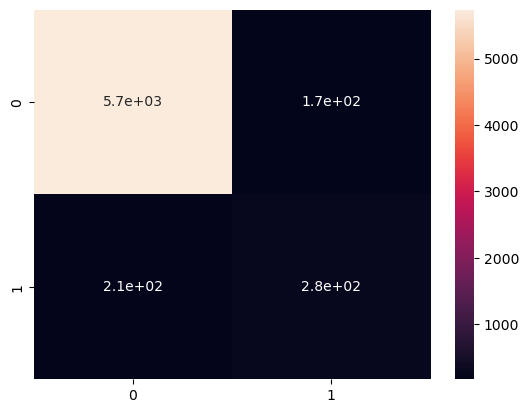

In [64]:
#predicting the Test set results
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [67]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5906
           1       0.62      0.57      0.59       487

    accuracy                           0.94      6393
   macro avg       0.79      0.77      0.78      6393
weighted avg       0.94      0.94      0.94      6393

